In [1]:
import sys, os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
import caffe

In [3]:
caffe.set_device(3)
caffe.set_mode_gpu()

In [16]:
net = caffe.Net("/home/vgenty/caffe/models/ilsvrc_alexnet/tv2.prototxt", 
                "/data/vgenty/caffe_alexnet_train_ilsvrc_iter_20000.caffemodel", 
                caffe.TEST)

In [9]:
output = net.forward()

In [10]:
print output


{'loss': array(0.008603652939200401, dtype=float32), 'accuracy': array(1.0, dtype=float32)}


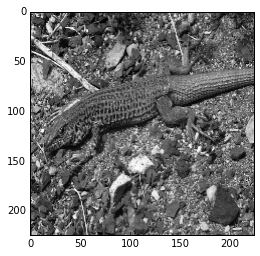

In [7]:
plt.imshow(net.blobs['data'].data[1][0], cmap = "Greys_r")

In [ ]:
print net.blobs['fc8'].data[1].argmax()

In [ ]:
print net.blobs['label'].data[1]

In [31]:
lizard_scores = []
for i in xrange(1000):
    net.forward()
    for j in range(50):
        if net.blobs['label'].data[j] == 29.0:
            lizard_scores.append(net.blobs['fc8'].data[j].copy())

lizard_classes = []
for score in lizard_scores:
    lizard_classes.append(score.argmax())
check = []
for cl in lizard_classes:
    if cl == 29:
        check.append(1.)
    else:
        check.append(0.)
        
accuracy = sum(check)/len(check)
print accuracy

0.759405940594


In [32]:
counts = np.bincount(lizard_classes)
print counts
print counts.argsort()[-1:-6:-1]

[  0   8   0   0   7   8  16   0   8   0   0   0   0   8   8   0   7   0
   0   0   0   0   8   0   0   8  40   8  16 767  15   0   8   7   0  16
   7   8   8  16   0   0   0   0   0   0   0   8]
[29 26  6 39 28]


(767, 50)


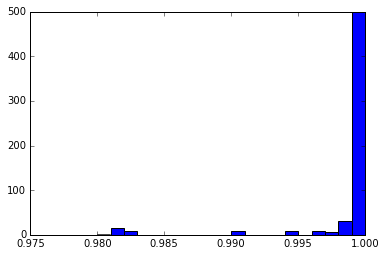

In [67]:
correct_lizard_scores = [] #list of all the scores for the images that it gets correct
for i in range(len(lizard_classes)):
    if lizard_classes[i] == 29:
        correct_lizard_scores.append(lizard_scores[i])
exponential_scores = np.exp(correct_lizard_scores)
total = np.sum(exponential_scores, axis = 1)
normalized_scores = []
for i in range(len(total)):
    normalized_scores.append(exponential_scores[i]/total[i])

print np.shape(normalized_scores)
plt.hist([score[29] for score in normalized_scores], bins = np.linspace(.98,1.,21))
plt.show()
        

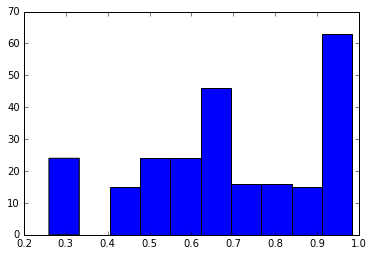

In [72]:
incorrect_scores = [] #list of all the scores for the images that it gets incorrect
incorrect_classes = [] #list of the classes guessed for those that it gets incorrect
for i in range(len(lizard_classes)):
    if lizard_classes[i] != 29:
        incorrect_scores.append(lizard_scores[i])
        incorrect_classes.append(lizard_classes[i])
exp_incorrect_scores = np.exp(incorrect_scores)
tot = np.sum(exp_incorrect_scores, axis = 1)
normalized_inorrect_scores = []
for i in range(len(tot)):
    normalized_inorrect_scores.append(exp_incorrect_scores[i]/tot[i])
    
plt.hist([normalized_inorrect_scores[i][incorrect_classes[i]] for i in range(len(tot))])
plt.show()

In [78]:
m = len(lizard_classes)
confident_classes = [] #class chosen for the images that it is confident in the choice
exp_scores = np.exp(lizard_scores)    
total_scores = np.sum(exp_scores, axis = 1)
norm_scores = []
for i in range(m):
    norm_scores.append(exp_scores[i]/total_scores[i])

for i in range(m):
    if norm_scores[i][lizard_classes[i]] >= .75:
        confident_classes.append(lizard_classes[i])

check = []
for cl in confident_classes:
    if cl == 29:
        check.append(1.)
    else:
        check.append(0.)
confident_accuracy = sum(check)/len(check)
print confident_accuracy

0.858064516129
